In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt

In [5]:
data_path = '../Datasets/Datasets.csv'
data = pd.read_csv(data_path)
data

,Brand,Dimension Leight (mm),Dimension Width (mm),Dimesion Thickness (mm),Weight (g),Battery Type,Battery Capacity (mAh),Screen Size (cm2),Resolution Height (pixels),Resolution Width (pixels),CPU (cores),Internal Storage (GB),RAM (GB),NFC Support,Price (USD)
0,Apple iPad mini (2024),195.4,134.8,6.3,293,1,5078,203.9,1488,2266,6,128,8,0,600.000
1,Apple iPhone 16 Pro Max,163.0,77.6,8.3,227,1,4685,115.6,1320,2868,6,256,8,1,1199.990
2,Apple iPhone 16 Pro,149.6,71.5,8.3,199,1,3582,96.4,1206,2622,6,128,8,1,999.990
3,Apple iPhone 16 Plus,160.9,77.8,7.8,199,1,4674,110.2,1290,2796,6,128,8,1,899.000
4,Apple iPhone 16,147.6,71.6,7.8,170,1,3561,91.7,1179,2556,6,128,8,1,829.990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,Realme GT5 Pro,161.7,75.1,9.2,218,1,5400,111.7,1264,2780,6,256,12,1,430.000
829,Realme Narzo 60x,165.7,76.0,7.9,190,1,5000,109.0,1080,2400,6,128,4,0,143.988
830,Realme GT5 240W,163.1,75.4,8.9,205,1,4600,109.2,1240,2772,6,1,24,1,470.000
831,Realme GT5,163.1,75.4,8.9,205,1,5240,109.2,1240,2772,6,256,12,1,380.000


In [6]:
data['Brand'] = data['Brand'].str.split().str[0].str.title()
data

,Brand,Dimension Leight (mm),Dimension Width (mm),Dimesion Thickness (mm),Weight (g),Battery Type,Battery Capacity (mAh),Screen Size (cm2),Resolution Height (pixels),Resolution Width (pixels),CPU (cores),Internal Storage (GB),RAM (GB),NFC Support,Price (USD)
0,Apple,195.4,134.8,6.3,293,1,5078,203.9,1488,2266,6,128,8,0,600.000
1,Apple,163.0,77.6,8.3,227,1,4685,115.6,1320,2868,6,256,8,1,1199.990
2,Apple,149.6,71.5,8.3,199,1,3582,96.4,1206,2622,6,128,8,1,999.990
3,Apple,160.9,77.8,7.8,199,1,4674,110.2,1290,2796,6,128,8,1,899.000
4,Apple,147.6,71.6,7.8,170,1,3561,91.7,1179,2556,6,128,8,1,829.990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,Realme,161.7,75.1,9.2,218,1,5400,111.7,1264,2780,6,256,12,1,430.000
829,Realme,165.7,76.0,7.9,190,1,5000,109.0,1080,2400,6,128,4,0,143.988
830,Realme,163.1,75.4,8.9,205,1,4600,109.2,1240,2772,6,1,24,1,470.000
831,Realme,163.1,75.4,8.9,205,1,5240,109.2,1240,2772,6,256,12,1,380.000


In [7]:
brands = data['Brand'].unique()

Training model for brand: Apple
Best Parameters for Apple: {'learning_rate': 0.05, 'max_depth': 12, 'n_estimators': 100, 'subsample': 0.8}
Evaluation for brand Apple:
  Train MSE: 599.49, Train R²: 1.00
  Test MSE: 9219.88, Test R²: 0.91
Model and scaler for Apple saved.


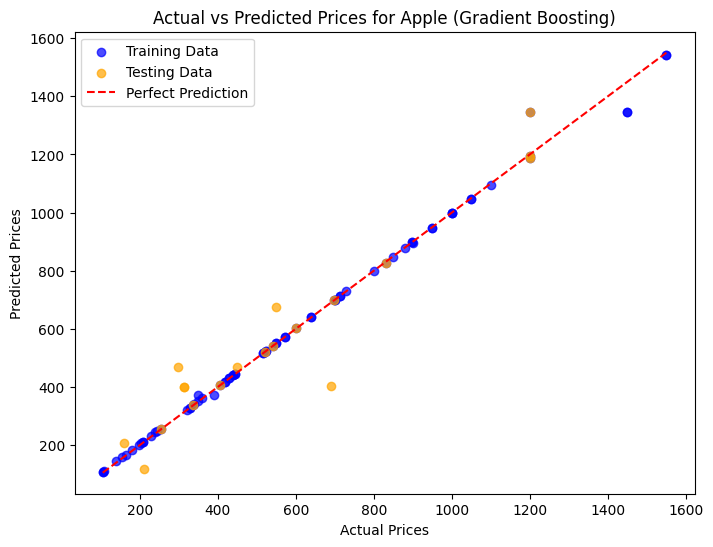

Training model for brand: Asus
Best Parameters for Asus: {'learning_rate': 0.05, 'max_depth': 12, 'n_estimators': 300, 'subsample': 0.8}
Evaluation for brand Asus:
  Train MSE: 9879.62, Train R²: 0.95
  Test MSE: 29998.81, Test R²: 0.69
Model and scaler for Asus saved.


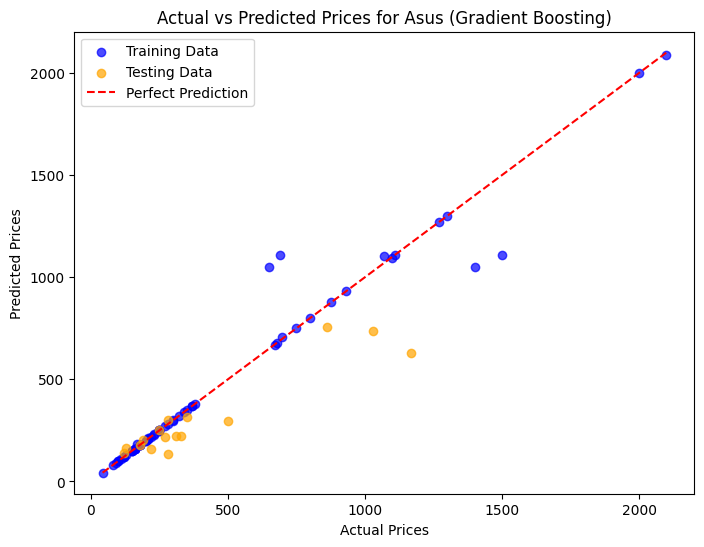

Training model for brand: Alcatel
Best Parameters for Alcatel: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Evaluation for brand Alcatel:
  Train MSE: 87.04, Train R²: 0.97
  Test MSE: 780.16, Test R²: 0.81
Model and scaler for Alcatel saved.


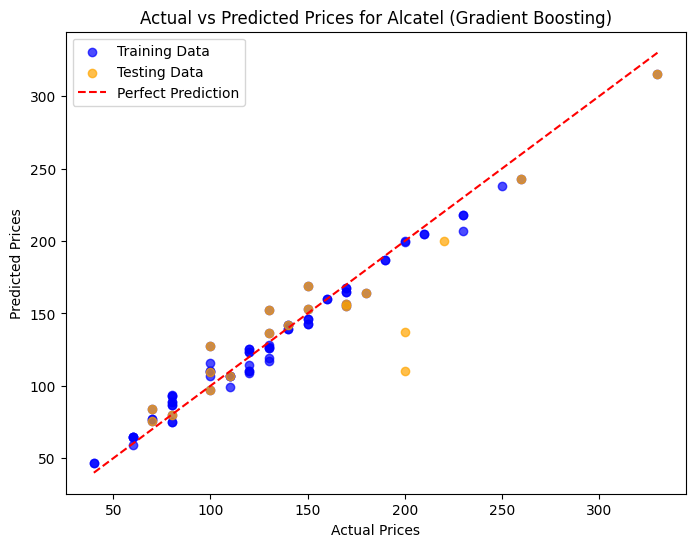

Training model for brand: Samsung
Best Parameters for Samsung: {'learning_rate': 0.01, 'max_depth': 12, 'n_estimators': 300, 'subsample': 0.8}
Evaluation for brand Samsung:
  Train MSE: 378.93, Train R²: 0.99
  Test MSE: 88232.74, Test R²: 0.62
Model and scaler for Samsung saved.


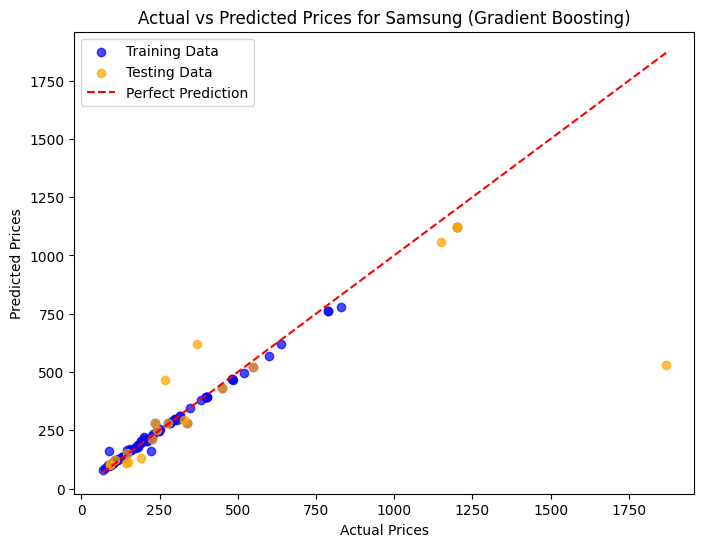

Training model for brand: Xiaomi
Best Parameters for Xiaomi: {'learning_rate': 0.1, 'max_depth': 12, 'n_estimators': 50, 'subsample': 0.9}
Evaluation for brand Xiaomi:
  Train MSE: 19.32, Train R²: 1.00
  Test MSE: 4268.49, Test R²: 0.94
Model and scaler for Xiaomi saved.


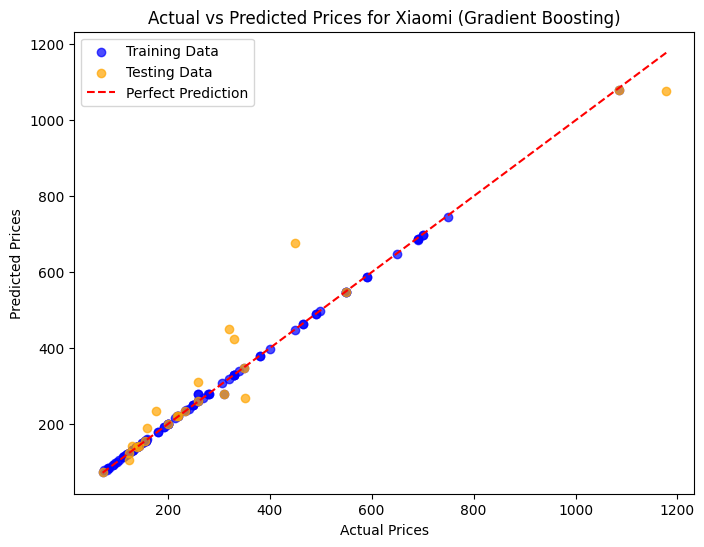

Training model for brand: Oppo
Best Parameters for Oppo: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Evaluation for brand Oppo:
  Train MSE: 265.43, Train R²: 0.99
  Test MSE: 9448.78, Test R²: 0.68
Model and scaler for Oppo saved.


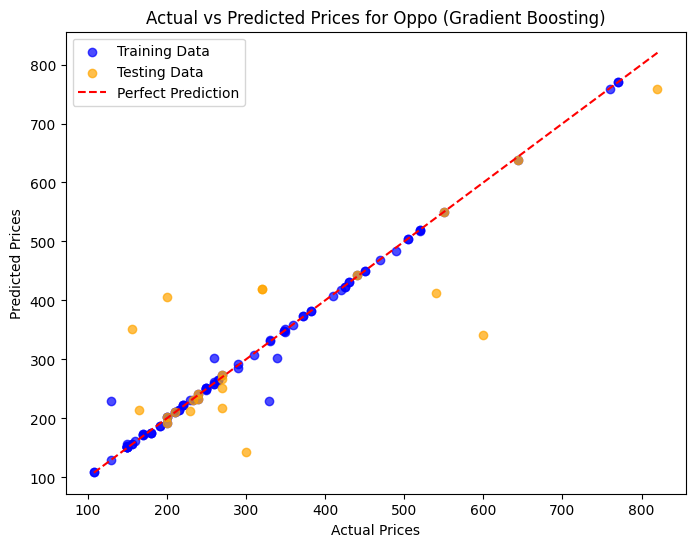

Training model for brand: Huawei
Best Parameters for Huawei: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}
Evaluation for brand Huawei:
  Train MSE: 6866.83, Train R²: 0.95
  Test MSE: 38836.17, Test R²: 0.66
Model and scaler for Huawei saved.


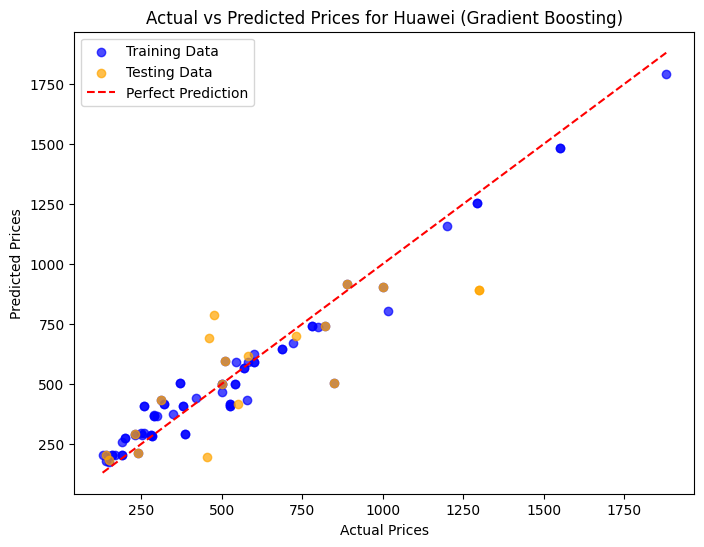

Training model for brand: Realme
Best Parameters for Realme: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Evaluation for brand Realme:
  Train MSE: 202.57, Train R²: 0.99
  Test MSE: 6072.01, Test R²: 0.75
Model and scaler for Realme saved.


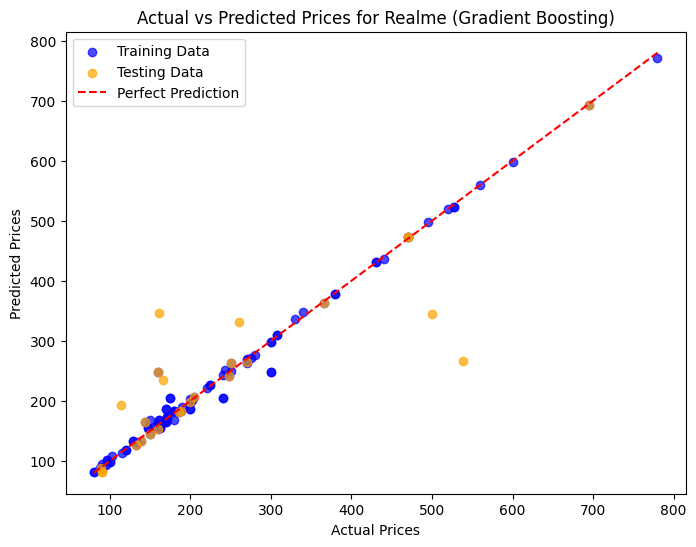

In [8]:
for brand in brands:
    print(f"Training model for brand: {brand}")
    
    brand_data = data[data['Brand'] == brand]

    X_brand = brand_data.drop(columns=['Brand', 'Price (USD)'])
    y_brand = brand_data['Price (USD)']
    
    scaler = StandardScaler()
    X_brand_scaled = scaler.fit_transform(X_brand)
    
    X_train, X_test, y_train, y_test = train_test_split(X_brand_scaled, y_brand, test_size=0.2, random_state=42)

    param_grid = {
        'n_estimators': [50, 100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7, 12],
        'subsample': [0.8, 0.9, 1.0]
    }

    gbr_model = GradientBoostingRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=gbr_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    print(f"Best Parameters for {brand}: {grid_search.best_params_}")

    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    print(f"Evaluation for brand {brand}:")
    print(f"  Train MSE: {train_mse:.2f}, Train R²: {train_r2:.2f}")
    print(f"  Test MSE: {test_mse:.2f}, Test R²: {test_r2:.2f}")

    model_filename = f'{brand}_gbr_model.pkl'
    scaler_filename = f'{brand}_scaler.pkl'
    joblib.dump(best_model, model_filename)
    joblib.dump(scaler, scaler_filename)
    print(f"Model and scaler for {brand} saved.")

    plt.figure(figsize=(8, 6))
    plt.scatter(y_train, y_train_pred, alpha=0.7, color='blue', label='Training Data')
    plt.scatter(y_test, y_test_pred, alpha=0.7, color='orange', label='Testing Data')
    plt.plot([y_brand.min(), y_brand.max()], [y_brand.min(), y_brand.max()], color='red', linestyle='--', label='Perfect Prediction')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Actual vs Predicted Prices for {brand} (Gradient Boosting)')
    plt.legend()
    plt.show()

In [9]:
# def predict_price_gbr(brand, input_specs):
#     model_filename = f'{brand}_gbr_model.pkl'
#     scaler_filename = f'{brand}_scaler.pkl'
#     try:
#         gbr_model = joblib.load(model_filename)
#         scaler = joblib.load(scaler_filename)
#         input_scaled = scaler.transform([input_specs])
#         predicted_price = gbr_model.predict(input_scaled)
#         return predicted_price[0]
#     except FileNotFoundError:
#         print(f"No model available for the brand: {brand}")
#         return None